In [1]:
import csv
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

import ps_post_patch as pp #post patch script

sns.set(style = "whitegrid") #Makes a white backround with gray horizontal gridmarks at y-values
sns.set_context("notebook")

In [2]:
#Constant and reused variables 
colors = ['#31a354', '#a1d99b', '#fc9272', '#de2d26', '#f7fcb9'] #For seaborn plots
x_order = ['Nuc-high seal', 'Nuc-low seal', 'No-high seal', 'No-low seal', 'Entire cell']

In [3]:
#Still working on how to use for dataframes
class my_dataframe():
    """Create a class in a usable way for the dataframe."""
    pass

### Functions: Set-up & Filtering Dataframe

In [4]:
def get_ps_df():
    """To read the Patchseq Google Doc as a pandas dataframe.
    
    Arguements: none
    
    Returns:
        ps_df: pandas dataframe
    """
    
    ps_df = pd.read_csv("C:/users/ramr/documents/github/coding/personal-projects/csv/ps_mouse.csv")
    
    ps_df.dropna(subset = ["Lims tube id"], inplace = True)
    ps_df = ps_df[ps_df["Lims tube id"].str.match('PA')]
    ps_df = pp.postpatch_reclass(ps_df)
    
    ps_df = ps_df.loc[:, ["Date", 
                          "User", 
                          "Region", 
                          "Layer", 
                          "Depth (um)", 
                          "patch duration",
                          "extraction pressure applied (mbar)", 
                          "post_patch", 
                          "Resolution index", 
                          "SM_QC_PF", 
                          "Lims tube id"]]
    #Optional columns     
    #"Post patch?", "Post patch pipette R", 
    #"Pipette size (MOhms)", "Nucleus sucked in?", "SM_QC_PF", "Time to Entire-Cell", "File", "63x go no go"
    return ps_df

In [5]:
def sort_date(df):
    """To sort the date column in ps_df.
    
    Arguements:
        df: pandas dataframe
        
    Returns:
        df: pandas dataframe with sorted date column
    """
        
    #Changing to string to add 20 in front of strings within date column
    df['Date'] = df['Date'].astype('str')
    df['Date'] = '20' + df['Date']
    df['Date'] = pd.to_datetime(df['Date']) #Converting date to YYYY-MM-DD
    df = df.set_index('Date') #Set date column as index column

    #Production Date Start = '2017-10-01' 
    start_date = '2017-10-01'
    df = df[start_date:] #Choosing start & end date  
    df.reset_index(inplace = True)
    df.sort_values(by = ['Date'], inplace = True)
    return df 

### Functions: Plots

In [6]:
def pie_plot(df):
    """To create a pie chart using df converted to pivot table.
    
    Arguements:
        df: pandas dataframe converted to pivot table
    
    Returns: None
    """
    
    df1 = df.groupby(['post_patch']).size().reset_index(name = 'count')
    df1.set_index('post_patch', inplace = True)
    
    explode = (0.05, 0.05, 0.05, 0.05, 0.05) #splits the categories
    colors = ['#f7fcb9','#fc9272', '#de2d26', '#31a354', '#a1d99b']
    #Entire, No-high, No-low, Nuc-high, Nuc-low
    #Yellow, Light Red, Red, Green, Light Green
    
    df1.plot.pie(y = 'count', autopct='%1.1f%%', figsize = (8,8), shadow = True, legend = False, 
                 explode = explode, colors = colors)
    plt.title('Post Patch Percentage', loc = 'center', fontsize = 14)
    plt.axes().set_ylabel('')

In [7]:
def bar_plot(df): 
    """To create a horizontal bar graph using df converted to pivot table.
    
    Arguements:
        df: pandas dataframe converted to pivot table
    
    Returns: None
    """
    
    df1 = df.groupby(['post_patch']).size().reset_index(name = 'count')
    
    plt.subplots(figsize=(8,5)) #Has to be before the plot to work
    
    ax = sns.barplot(x = 'count', y = 'post_patch', order = x_order, palette = colors, saturation = 1, data = df1)
    ax.set(xlabel = 'Count', ylabel = 'Post Patch Outcomes')
    ax.set_title("Counts of Post Patch Outcomes for User")
    
    for p in ax.patches: #Figure out how this loop works
        value = p.get_width()
        ax.text(value, p.get_y() + p.get_height()/2 + 0.1, '{:1.0f}'.format(value), ha = "left", fontsize = 12)
        
# + 0.1 = chooses location of the value vertically

In [8]:
#Making global variables
ps_df = get_ps_df()
ps_df = sort_date(ps_df)

C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\ramr\AppData\Local\Continuum\anaconda2\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [9]:
ps_df.head()

,Date,User,Region,Layer,Depth (um),patch duration,extraction pressure applied (mbar),post_patch,Resolution index,SM_QC_PF,Lims tube id
0,2018-01-03,PA,VISp,layer 2/3,32.9,9.800000,-27.0,Nuc-high seal,0.868238,NaN,PAS4_180103_451_A01
1,2018-01-03,PA,VISp,layer 4,33.8,9.083333,-34.0,Nuc-high seal,1.000000,NaN,PAS4_180103_452_A01
460,2018-01-05,PA,VISp,5,47.3,5.966667,0.0,No-low seal,0.000000,NaN,PAS4_180105_451_A01
2,2018-01-08,PA,VISp,5,45.4,11.166667,-40.0,Nuc-high seal,0.467257,NaN,PAS4_180108_451_A01
3,2018-01-08,PA,VISp,3-Feb,52.0,10.850000,-40.0,Nuc-high seal,1.000000,pass,PAS4_180108_452_A01


In [10]:
ps_df.tail()

,Date,User,Region,Layer,Depth (um),patch duration,extraction pressure applied (mbar),post_patch,Resolution index,SM_QC_PF,Lims tube id
350,2018-10-08,PA,VISp,6a,59.4,8.450000,-40.0,Nuc-high seal,NaN,NaN,PAS4_181008_452_A01
351,2018-10-08,PA,VISp,3-Feb,63.1,9.466667,-39.0,Nuc-high seal,NaN,NaN,PAS4_181008_453_A01
353,2018-10-08,PA,VISp,3-Feb,55.0,10.583333,-30.0,Nuc-high seal,NaN,NaN,PAS4_181008_455_A01
355,2018-10-09,PA,VISp,4,55.4,11.033333,-10.0,Nuc-high seal,NaN,NaN,PAS4_181009_452_A01
354,2018-10-09,PA,VISp,3-Feb,56.9,8.266667,-33.0,Nuc-high seal,NaN,NaN,PAS4_181009_451_A01


In [11]:
#Outputing dataframe as excel sheet
#writer = pd.ExcelWriter('TITLE.xlsx')
#dataframe.to_excel(writer, 'Sheet#)

writer = pd.ExcelWriter('my_ps_df.xlsx')
ps_df.to_excel(writer, 'Sheet1')
writer.save()

### Main Function:

In [12]:
def main():
    """Prints out graphs and charts
    
    Arguements: none
    
    Returns: none
    """
    
    #Prints plots
    print(ps_df['post_patch'].value_counts())
    print(ps_df['post_patch'].value_counts().sum())
    pie_plot(ps_df)
    bar_plot(ps_df)

### Plots

Nuc-high seal    356
Nuc-low seal      72
No-low seal       46
No-high seal      32
Entire cell        7
Name: post_patch, dtype: int64
513


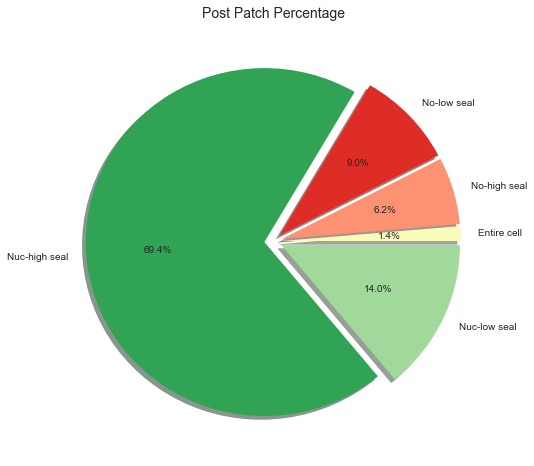

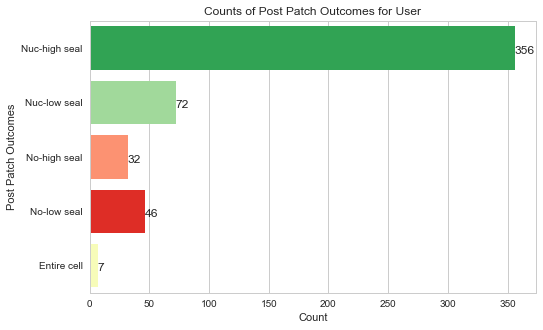

In [13]:
main()

### Create a weekly/Monthly tracker similar to your excel sheet in onedrive

### Extra Plots

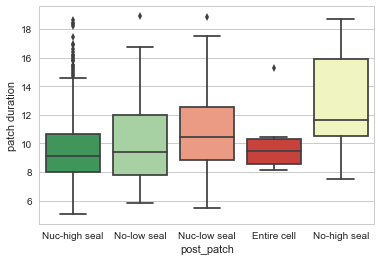

In [14]:
sns.boxplot(x = 'post_patch', y = 'patch duration', data = ps_df[ps_df['patch duration'] <= 20], palette = colors)

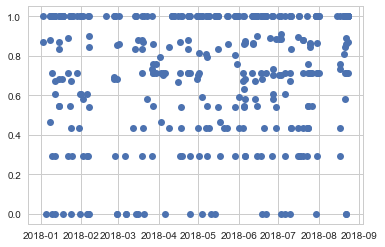

In [15]:
plt.plot_date(x = 'Date', y = 'Resolution index', data = ps_df)